# 컬러 이미지 다중 분류
---
- cifar-10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!nvidia-smi

Thu Jan  5 00:37:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    53W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:
y_train = y_train.reshape(-1)
y_test = y_test.flatten()

y_train.shape, y_test.shape

((50000,), (10000,))

In [6]:
class_name = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

In [7]:
samples = np.random.randint(len(x_train), size = 9)
samples

array([14832,  1130, 23987, 39917, 32756, 44355, 19335, 12830, 14584])

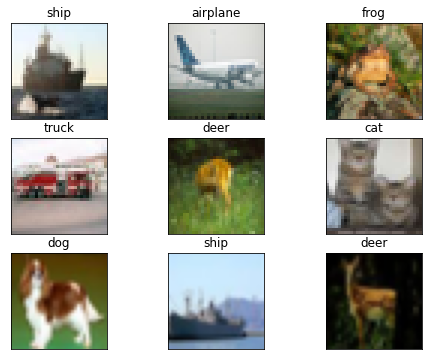

In [11]:
plt.figure(figsize = (8,6))
for i, idx in enumerate(samples): # enumerate 이너머레이트는 value의 값과 index의 값을 같이 가져온다.
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[idx])
  plt.yticks([])
  plt.xticks([])
  plt.title(class_name[y_train[idx]])
  
plt.show()

### 검증 데이터

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(35000, 32, 32, 3) (15000, 32, 32, 3)
(35000,) (15000,)


# 정규화

In [17]:
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# 원핫 인코딩
- 다중 분류 / categorical / model compile에선 categorical_crossentropy
- 2진 분류 / binary / model compile에선 binary_crossentropy

In [21]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

# 모델 만들기

In [22]:
x_train.shape

(35000, 32, 32, 3)

In [24]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation = 'relu', input_shape = (32, 32, 3)), # conv2d = padding, 테두리를 만든다는 뜻
    layers.MaxPooling2D(2), # pooling은 이미지 사이즈를 반으로 줄인다는 뜻.
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [26]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 16s 5ms/step - loss: 1.8024 - acc: 0.3251 - val_loss: 1.5358 - val_acc: 0.4369
Epoch 2/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.3808 - acc: 0.4984 - val_loss: 1.2912 - val_acc: 0.5297
Epoch 3/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.1944 - acc: 0.5717 - val_loss: 1.1633 - val_acc: 0.5844
Epoch 4/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.0740 - acc: 0.6148 - val_loss: 1.1692 - val_acc: 0.5834
Epoch 5/30
1094/1094 [==============================] - 5s 4ms/step - loss: 0.9793 - acc: 0.6496 - val_loss: 1.0465 - val_acc: 0.6262
Epoch 6/30
1094/1094 [==============================] - 5s 4ms/step - loss: 0.9020 - acc: 0.6768 - val_loss: 1.0505 - val_acc: 0.6327
Epoch 7/30
1094/1094 [==============================] - 5s 4ms/step - loss: 0.8373 - acc: 0.7037 - val_loss: 1.0281 - val_acc: 0.6455
Epoch 8/30
1094/1094 [==============================] - 5s 4m

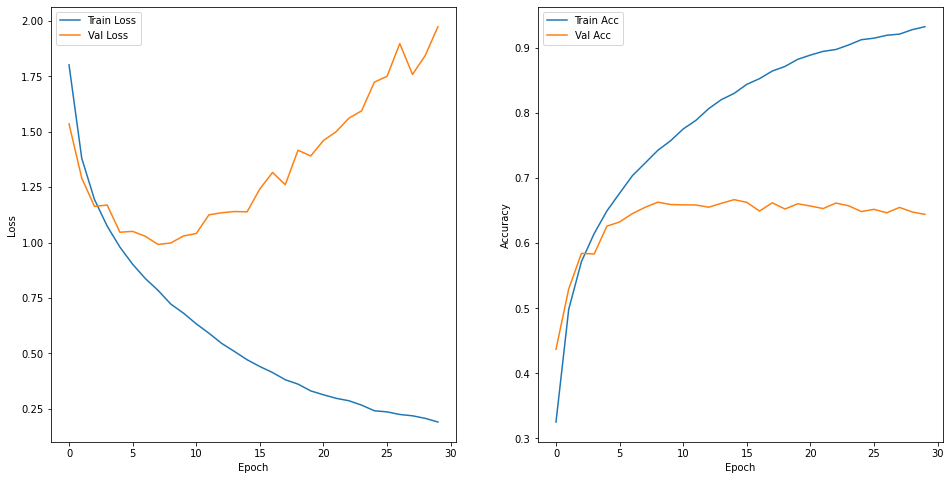

In [27]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

### Dropout(드롭아웃)

In [28]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation = 'relu', input_shape = (32, 32, 3)), # conv2d = padding, 테두리를 만든다는 뜻
    layers.MaxPooling2D(2), # pooling은 이미지 사이즈를 반으로 줄인다는 뜻.
    layers.Dropout(0.3), # 1000개가 있으면 300개로 끊어서 학습을 안시키겠다는 뜻.
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [29]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.9190 - acc: 0.2597 - val_loss: 1.6752 - val_acc: 0.3674
Epoch 2/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.5562 - acc: 0.4187 - val_loss: 1.3746 - val_acc: 0.5033
Epoch 3/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.4180 - acc: 0.4799 - val_loss: 1.4905 - val_acc: 0.4835
Epoch 4/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.3435 - acc: 0.5109 - val_loss: 1.2238 - val_acc: 0.5671
Epoch 5/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2921 - acc: 0.5279 - val_loss: 1.1778 - val_acc: 0.5818
Epoch 6/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2568 - acc: 0.5465 - val_loss: 1.1929 - val_acc: 0.5798
Epoch 7/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2191 - acc: 0.5600 - val_loss: 1.2948 - val_acc: 0.5387
Epoch 8/30
1094/1094 [==============================] - 5s 5ms

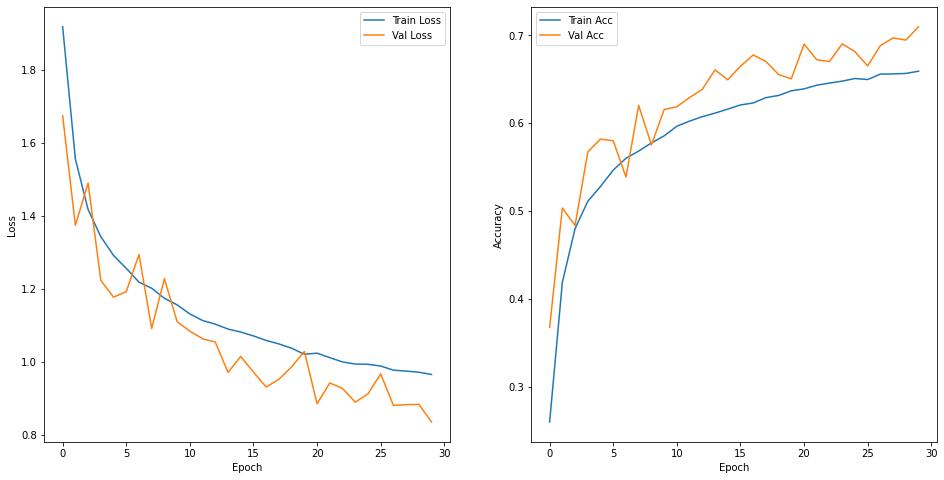

In [30]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

### 배치 정규화
- BatchNomalization

In [31]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation = 'relu', input_shape = (32, 32, 3)), # conv2d = padding, 테두리를 만든다는 뜻
    layers.MaxPooling2D(2), # pooling은 이미지 사이즈를 반으로 줄인다는 뜻.
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(), # dropout 대신에 batchnormal을 넣어도 된다. 과적합을 방지하는 방법.
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [32]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                verbose = 1)

Epoch 1/30
1094/1094 [==============================] - 7s 5ms/step - loss: 1.6903 - acc: 0.3803 - val_loss: 1.5285 - val_acc: 0.4436
Epoch 2/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.3152 - acc: 0.5238 - val_loss: 1.2128 - val_acc: 0.5679
Epoch 3/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1458 - acc: 0.5901 - val_loss: 1.3625 - val_acc: 0.5309
Epoch 4/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0372 - acc: 0.6318 - val_loss: 1.0465 - val_acc: 0.6333
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9655 - acc: 0.6603 - val_loss: 0.9016 - val_acc: 0.6850
Epoch 6/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.9052 - acc: 0.6837 - val_loss: 1.0036 - val_acc: 0.6565
Epoch 7/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8662 - acc: 0.6946 - val_loss: 0.9478 - val_acc: 0.6743
Epoch 8/30
1094/1094 [==============================] - 5s 5ms

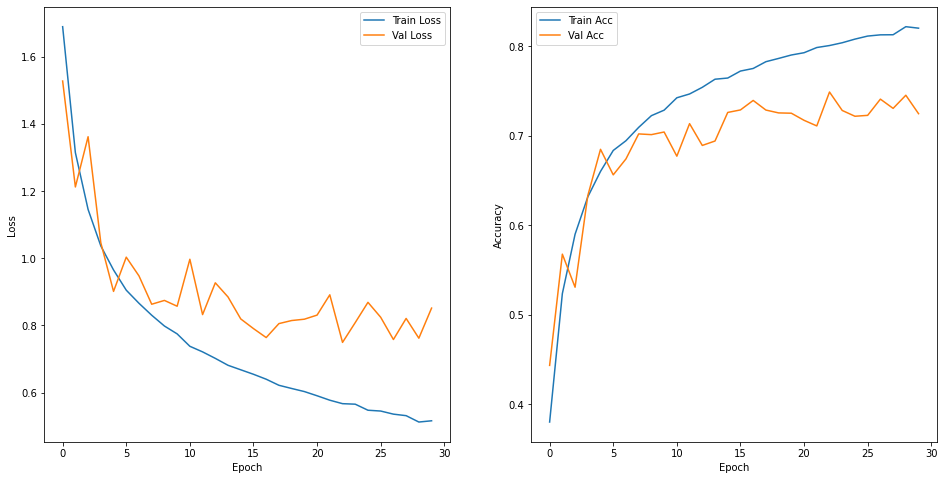

In [33]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [34]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8630 - acc: 0.7198


[0.8629566431045532, 0.7197999954223633]

### 콜백(Callback)
- ModelCheckpoint
##### 모델의 성능이 지금보다 좋아졌는지 판단하여, 저장하고 저장한다.

In [35]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation = 'relu', input_shape = (32, 32, 3)), # conv2d = padding, 테두리를 만든다는 뜻
    layers.MaxPooling2D(2), # pooling은 이미지 사이즈를 반으로 줄인다는 뜻.
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(), # dropout 대신에 batchnormal을 넣어도 된다. 과적합을 방지하는 방법.
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [39]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
  ckpt_path,
  monitor = 'val_loss',
  save_weight_only = True, # w/b값만 저장
  save_best_only = True,
  verbose = 1
)

In [40]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                callbacks=[ckpt_callback],
                verbose = 1)

Epoch 1/30
1089/1094 [============================>.] - ETA: 0s - loss: 1.7393 - acc: 0.3528
Epoch 1: val_loss improved from inf to 1.52500, saving model to cifar10.ckpt


1094/1094 [==============================] - 9s 7ms/step - loss: 1.7381 - acc: 0.3532 - val_loss: 1.5250 - val_acc: 0.4714
Epoch 2/30
1089/1094 [============================>.] - ETA: 0s - loss: 1.3667 - acc: 0.5038
Epoch 2: val_loss improved from 1.52500 to 1.32484, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 6ms/step - loss: 1.3668 - acc: 0.5038 - val_loss: 1.3248 - val_acc: 0.5167
Epoch 3/30
1088/1094 [============================>.] - ETA: 0s - loss: 1.2043 - acc: 0.5693
Epoch 3: val_loss improved from 1.32484 to 1.12076, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 1.2027 - acc: 0.5699 - val_loss: 1.1208 - val_acc: 0.6017
Epoch 4/30
1086/1094 [============================>.] - ETA: 0s - loss: 1.1027 - acc: 0.6040
Epoch 4: val_loss improved from 1.12076 to 1.09866, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 1.1024 - acc: 0.6042 - val_loss: 1.0987 - val_acc: 0.6063
Epoch 5/30
1086/1094 [============================>.] - ETA: 0s - loss: 1.0296 - acc: 0.6341
Epoch 5: val_loss improved from 1.09866 to 1.05149, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 1.0291 - acc: 0.6342 - val_loss: 1.0515 - val_acc: 0.6235
Epoch 6/30
1092/1094 [============================>.] - ETA: 0s - loss: 0.9739 - acc: 0.6538
Epoch 6: val_loss did not improve from 1.05149
1094/1094 [==============================] - 5s 5ms/step - loss: 0.9738 - acc: 0.6539 - val_loss: 1.1673 - val_acc: 0.6005
Epoch 7/30
1088/1094 [============================>.] - ETA: 0s - loss: 0.9244 - acc: 0.6755
Epoch 7: val_loss improved from 1.05149 to 0.94220, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 0.9242 - acc: 0.6759 - val_loss: 0.9422 - val_acc: 0.6725
Epoch 8/30
1089/1094 [============================>.] - ETA: 0s - loss: 0.8799 - acc: 0.6902
Epoch 8: val_loss did not improve from 0.94220
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8807 - acc: 0.6901 - val_loss: 1.1208 - val_acc: 0.6175
Epoch 9/30
1088/1094 [============================>.] - ETA: 0s - loss: 0.8540 - acc: 0.7006
Epoch 9: val_loss did not improve from 0.94220
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8537 - acc: 0.7007 - val_loss: 1.1812 - val_acc: 0.5842
Epoch 10/30
1087/1094 [============================>.] - ETA: 0s - loss: 0.8195 - acc: 0.7117
Epoch 10: val_loss improved from 0.94220 to 0.87204, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 0.8195 - acc: 0.7116 - val_loss: 0.8720 - val_acc: 0.6937
Epoch 11/30
1088/1094 [============================>.] - ETA: 0s - loss: 0.7943 - acc: 0.7209
Epoch 11: val_loss improved from 0.87204 to 0.86314, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 7ms/step - loss: 0.7943 - acc: 0.7207 - val_loss: 0.8631 - val_acc: 0.7054
Epoch 12/30
1087/1094 [============================>.] - ETA: 0s - loss: 0.7657 - acc: 0.7330
Epoch 12: val_loss did not improve from 0.86314
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7649 - acc: 0.7334 - val_loss: 0.9376 - val_acc: 0.6904
Epoch 13/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.7481 - acc: 0.7359
Epoch 13: val_loss improved from 0.86314 to 0.84330, saving model to cifar10.ckpt


1094/1094 [==============================] - 8s 7ms/step - loss: 0.7486 - acc: 0.7356 - val_loss: 0.8433 - val_acc: 0.7100
Epoch 14/30
1091/1094 [============================>.] - ETA: 0s - loss: 0.7298 - acc: 0.7439
Epoch 14: val_loss improved from 0.84330 to 0.80407, saving model to cifar10.ckpt


1094/1094 [==============================] - 7s 6ms/step - loss: 0.7300 - acc: 0.7437 - val_loss: 0.8041 - val_acc: 0.7251
Epoch 15/30
1083/1094 [============================>.] - ETA: 0s - loss: 0.7121 - acc: 0.7494
Epoch 15: val_loss did not improve from 0.80407
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7119 - acc: 0.7496 - val_loss: 0.8926 - val_acc: 0.6992
Epoch 16/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.6891 - acc: 0.7577
Epoch 16: val_loss did not improve from 0.80407
1094/1094 [==============================] - 6s 5ms/step - loss: 0.6890 - acc: 0.7578 - val_loss: 0.8225 - val_acc: 0.7162
Epoch 17/30
1085/1094 [============================>.] - ETA: 0s - loss: 0.6826 - acc: 0.7607
Epoch 17: val_loss did not improve from 0.80407
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6829 - acc: 0.7604 - val_loss: 0.8653 - val_acc: 0.7101
Epoch 18/30
1086/1094 [============================>.] - ETA: 0s - loss: 0.6599 - 

1094/1094 [==============================] - 7s 7ms/step - loss: 0.6047 - acc: 0.7874 - val_loss: 0.7705 - val_acc: 0.7419
Epoch 24/30
1086/1094 [============================>.] - ETA: 0s - loss: 0.5899 - acc: 0.7954
Epoch 24: val_loss did not improve from 0.77051
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5901 - acc: 0.7954 - val_loss: 0.8129 - val_acc: 0.7266
Epoch 25/30
1088/1094 [============================>.] - ETA: 0s - loss: 0.5821 - acc: 0.7949
Epoch 25: val_loss did not improve from 0.77051
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5821 - acc: 0.7949 - val_loss: 0.8699 - val_acc: 0.7072
Epoch 26/30
1091/1094 [============================>.] - ETA: 0s - loss: 0.5713 - acc: 0.8013
Epoch 26: val_loss did not improve from 0.77051
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5718 - acc: 0.8011 - val_loss: 0.8230 - val_acc: 0.7262
Epoch 27/30
1087/1094 [============================>.] - ETA: 0s - loss: 0.5606 - 

1094/1094 [==============================] - 7s 7ms/step - loss: 0.5614 - acc: 0.8033 - val_loss: 0.7375 - val_acc: 0.7537
Epoch 29/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.5452 - acc: 0.8090
Epoch 29: val_loss did not improve from 0.73752
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5456 - acc: 0.8087 - val_loss: 1.1399 - val_acc: 0.6574
Epoch 30/30
1085/1094 [============================>.] - ETA: 0s - loss: 0.5414 - acc: 0.8091
Epoch 30: val_loss did not improve from 0.73752
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5414 - acc: 0.8090 - val_loss: 0.9427 - val_acc: 0.6883
CPU times: user 4min 14s, sys: 31 s, total: 4min 44s
Wall time: 3min 6s


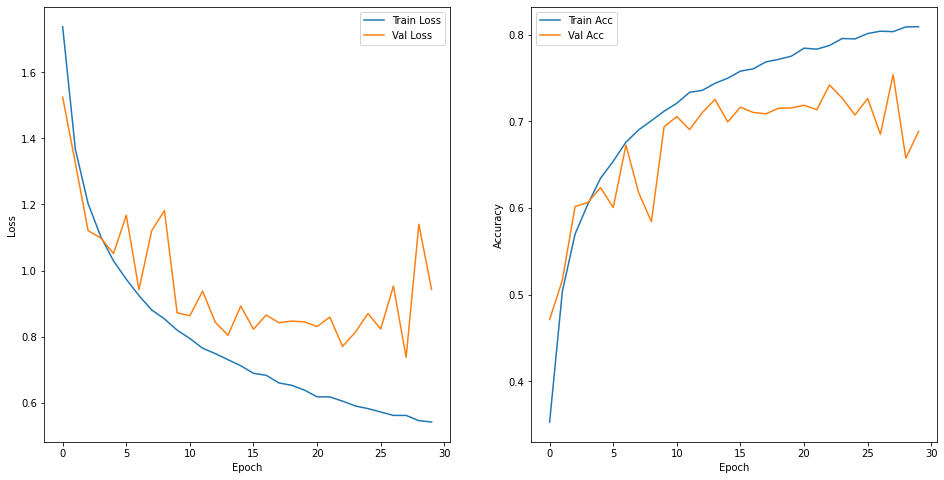

In [41]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [42]:
model.load_weights(ckpt_path)

In [43]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7579 - acc: 0.7456


[0.7579447031021118, 0.7455999851226807]

### EarlyStopping

In [45]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation = 'relu', input_shape = (32, 32, 3)), # conv2d = padding, 테두리를 만든다는 뜻
    layers.MaxPooling2D(2), # pooling은 이미지 사이즈를 반으로 줄인다는 뜻.
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(), # dropout 대신에 batchnormal을 넣어도 된다. 과적합을 방지하는 방법.
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)



In [46]:
from tensorflow.keras import callbacks
es_callback = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 0
)

In [47]:
%%time

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                callbacks=[ckpt_callback, es_callback],
                verbose = 1)

Epoch 1/30
1084/1094 [============================>.] - ETA: 0s - loss: 1.7311 - acc: 0.3512
Epoch 1: val_loss did not improve from 0.73752
1094/1094 [==============================] - 7s 5ms/step - loss: 1.7290 - acc: 0.3525 - val_loss: 1.5328 - val_acc: 0.4555
Epoch 2/30
1094/1094 [==============================] - ETA: 0s - loss: 1.3377 - acc: 0.5167
Epoch 2: val_loss did not improve from 0.73752
1094/1094 [==============================] - 5s 5ms/step - loss: 1.3377 - acc: 0.5167 - val_loss: 1.4621 - val_acc: 0.5116
CPU times: user 17.2 s, sys: 2.1 s, total: 19.3 s
Wall time: 12.6 s


In [48]:
model.load_weights(ckpt_path)

In [49]:
model.evaluate(x_test,y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7579 - acc: 0.7456


[0.7579447031021118, 0.7455999851226807]

In [50]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.4417359e-03, 5.5028178e-04, 1.3717875e-02, ..., 4.0829614e-02,
        1.6922193e-02, 5.5665046e-04],
       [1.2794273e-03, 3.7949078e-02, 1.6285007e-06, ..., 1.9408753e-07,
        9.6050042e-01, 2.2215935e-04],
       [4.7327481e-02, 1.3702026e-01, 9.2290802e-04, ..., 3.3406899e-04,
        7.7267146e-01, 3.6925837e-02],
       ...,
       [2.0508234e-05, 4.8459074e-06, 1.7539766e-03, ..., 1.4716921e-02,
        1.2851078e-05, 1.2378000e-05],
       [2.5224147e-02, 9.5855731e-01, 2.7998243e-03, ..., 1.3764916e-04,
        3.8891344e-04, 1.6494824e-04],
       [1.2818792e-07, 2.0747013e-09, 4.6681635e-05, ..., 8.8453734e-01,
        4.9146340e-09, 5.5978198e-08]], dtype=float32)

In [51]:
np.argmax(y_pred, axis=1)

array([3, 8, 8, ..., 5, 1, 7])